# Pre-Processing of Data from the Wind Tunnel

Data was collected on 29.10.25 with the force, and encoder counts from our sensor and the ground truth 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Cell 2: Load the CSV data from file
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('data/ground_truth_calibration/plot_take2_2.csv')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Data loaded successfully!
Shape: (28968, 13)


,timestamp_iso,timestamp_epoch,t_rel_s,device_name,port,value_raw_mps,value_clipped_mps,expected_error_pct,cov_lower_mps,cov_upper_mps,raw_serial_line,csv_col_0,csv_col_1
0,2025-10-29T17:21:57.838Z,15172.084414,42.931103,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN
1,2025-10-29T17:21:57.839Z,15172.087922,42.934611,Student,/dev/ttyACM1,1613405.00,20.0,NaN,NaN,NaN,"-0.5256, 1613405",-0.5256,1613405.0
2,2025-10-29T17:21:57.839Z,15172.088468,42.935157,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN
3,2025-10-29T17:21:57.839Z,15172.093459,42.940148,Student,/dev/ttyACM1,1613405.00,20.0,NaN,NaN,NaN,"-0.5356, 1613405",-0.5356,1613405.0
4,2025-10-29T17:21:57.839Z,15172.093505,42.940193,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN


In [27]:
# Cell 3: Display data info and check for missing values
print("Dataset Information:")
print(df.info())
print("\n" + "="*60)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*60)
print("\nColumn names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28968 entries, 0 to 28967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp_iso       28968 non-null  object 
 1   timestamp_epoch     28968 non-null  float64
 2   t_rel_s             28968 non-null  float64
 3   device_name         28968 non-null  object 
 4   port                28968 non-null  object 
 5   value_raw_mps       28968 non-null  float64
 6   value_clipped_mps   28968 non-null  float64
 7   expected_error_pct  13780 non-null  float64
 8   cov_lower_mps       13780 non-null  float64
 9   cov_upper_mps       13780 non-null  float64
 10  raw_serial_line     28968 non-null  object 
 11  csv_col_0           28968 non-null  float64
 12  csv_col_1           14348 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.9+ MB
None


Missing values:
timestamp_iso             0
timestamp_epoch           0
t_re

In [28]:
# Cell 4: Extract Ground Truth data
ground_truth_df = df[df['device_name'] == 'Ground Truth'][['timestamp_iso', 't_rel_s', 'csv_col_0']].copy()

print(f"Ground Truth records: {len(ground_truth_df)}")
print("\nGround Truth data:")
ground_truth_df.head(10)

Ground Truth records: 14620

Ground Truth data:


,timestamp_iso,t_rel_s,csv_col_0
0,2025-10-29T17:21:57.838Z,42.931103,-0.38
2,2025-10-29T17:21:57.839Z,42.935157,-0.38
4,2025-10-29T17:21:57.839Z,42.940193,-0.38
6,2025-10-29T17:21:57.839Z,42.947807,-0.38
8,2025-10-29T17:21:57.843Z,42.952867,-0.38
9,2025-10-29T17:21:57.843Z,42.955255,-0.38
12,2025-10-29T17:21:57.860Z,42.962805,-0.38
14,2025-10-29T17:21:57.870Z,42.965176,-0.38
16,2025-10-29T17:21:57.870Z,42.970995,-0.38
18,2025-10-29T17:21:57.870Z,42.975165,-0.38


In [29]:
student_df = df[df['device_name'] == 'Student'][['timestamp_iso', 't_rel_s', 'csv_col_0','csv_col_1']].copy()
print(f"Student records: {len(student_df)}")
print("\nStudent data:")
student_df.head(10)

Student records: 14348

Student data:


,timestamp_iso,t_rel_s,csv_col_0,csv_col_1
1,2025-10-29T17:21:57.839Z,42.934611,-0.5256,1613405.0
3,2025-10-29T17:21:57.839Z,42.940148,-0.5356,1613405.0
5,2025-10-29T17:21:57.839Z,42.944576,-0.5302,1613405.0
7,2025-10-29T17:21:57.843Z,42.950881,-0.5272,1613405.0
10,2025-10-29T17:21:57.843Z,42.955347,-0.5314,1613405.0
11,2025-10-29T17:21:57.843Z,42.962593,-0.5286,1613405.0
13,2025-10-29T17:21:57.870Z,42.964713,-0.5334,1613405.0
15,2025-10-29T17:21:57.870Z,42.969305,-0.5316,1613405.0
17,2025-10-29T17:21:57.870Z,42.974785,-0.5355,1613405.0
19,2025-10-29T17:21:57.870Z,42.979600,-0.5328,1613405.0


### Convert Raw Encoder Counts to Ticks

In [ ]:
# Calculate differences between consecutive points
student_df['csv_col_1_diff'] = student_df['csv_col_1'].diff()

# Print the first few rows to verify
print("Differences between consecutive points:")
print(student_df[['t_rel_s', 'csv_col_1', 'csv_col_1_diff']].head(10))

# fill with nan w/ 0
student_df['csv_col_1_diff'] = student_df['csv_col_1_diff'].fillna(0)

# Print number of NaNs
print("The number of NaNs", student_df['csv_col_1_diff'].isnull().sum())

# # Optional: Plot the differences
# plt.figure(figsize=(10, 6))
# plt.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Consecutive Differences')
# plt.xlabel('Time (s)')
# plt.ylabel('Difference in csv_col_1')
# plt.title('Differences Between Consecutive Points in csv_col_1')
# plt.grid(True)
# plt.legend()
# plt.show()

Differences between consecutive points:
      t_rel_s  csv_col_1  csv_col_1_diff
1   42.934611  1613405.0             NaN
3   42.940148  1613405.0             0.0
5   42.944576  1613405.0             0.0
7   42.950881  1613405.0             0.0
10  42.955347  1613405.0             0.0
11  42.962593  1613405.0             0.0
13  42.964713  1613405.0             0.0
15  42.969305  1613405.0             0.0
17  42.974785  1613405.0             0.0
19  42.979600  1613405.0             0.0
The number of NaNs 0


## Plotting

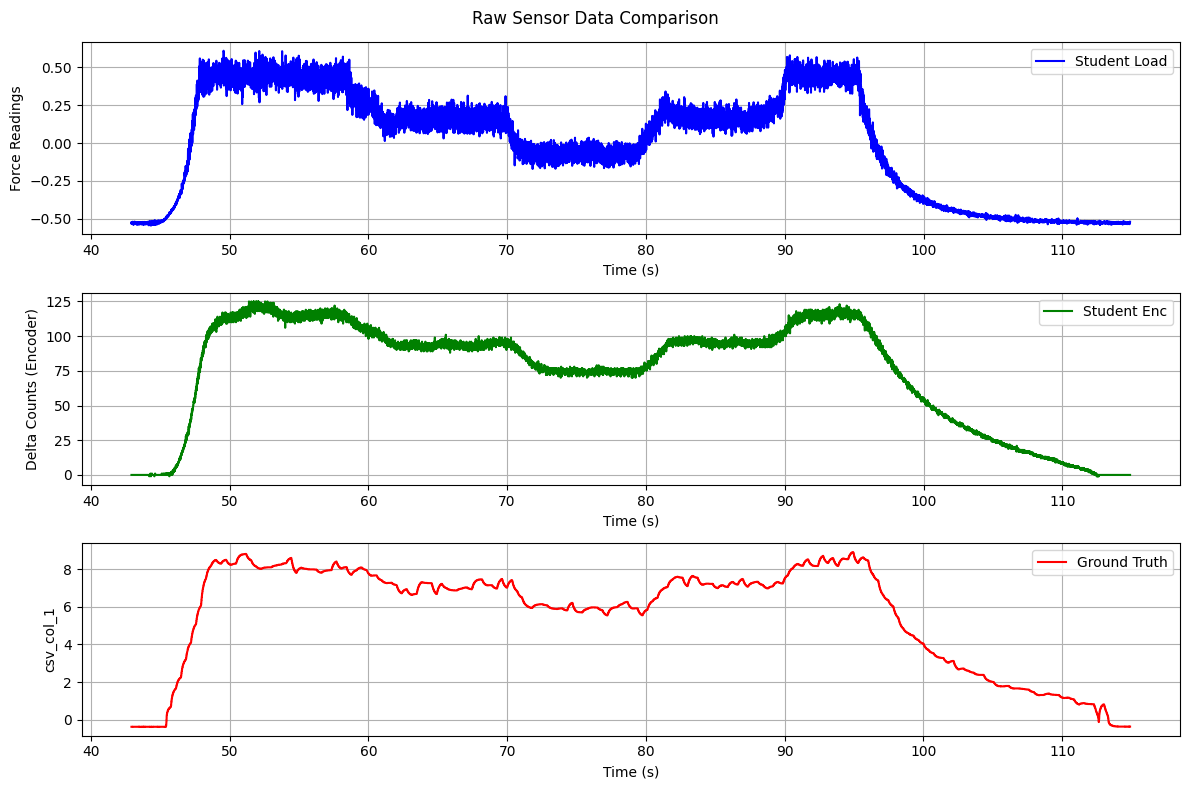

In [31]:
# Create figure with 2 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
fig.suptitle('Raw Sensor Data Comparison')

# First subplot:  Load Cell (N)
ax1.plot(student_df['t_rel_s'], student_df['csv_col_0'], label='Student Load', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Force Readings')
ax1.legend()
ax1.grid(True)

# Second subplot: Encoder Counts from student data
ax2.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Student Enc', color='green')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Delta Counts (Encoder)')
ax2.legend()
ax2.grid(True)

#Third Subplot: Ground Truth
ax3.plot(ground_truth_df['t_rel_s'], ground_truth_df['csv_col_0'], label='Ground Truth', color='red')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('csv_col_1')
ax3.legend()
ax3.grid(True)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Computing PSD
This will be important to identify the frequencies the noise and signal operate in and how to effectively seperate them

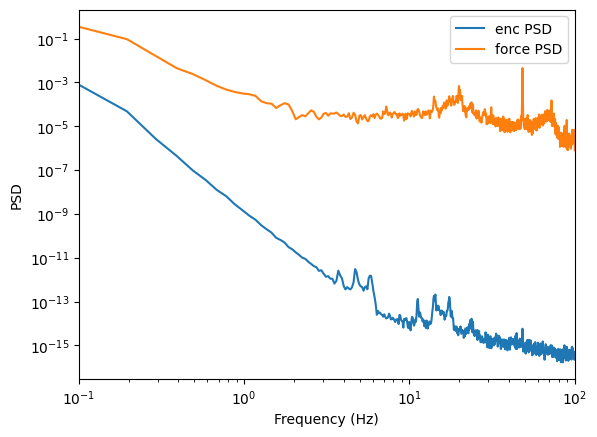

In [32]:
from scipy.signal import welch


load_data = student_df['csv_col_0'].values
enc_data = student_df['csv_col_1'].values

# normalise
enc_data_norm = enc_data / np.max(enc_data)
load_data_norm = load_data / np.max(load_data)


fs = 200.0
nperseg = 2048

f, P_enc = welch(enc_data_norm, fs=fs, nperseg=nperseg)
_, P_force = welch(load_data_norm, fs=fs, nperseg=nperseg)

plt.loglog(f, P_enc, label='enc PSD')
plt.loglog(f, P_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()

### Velocity Estimate from Load Cell

In [33]:
# Convert to velocity to better compare psd

# get average zero bias for first 100 samples
load_bias = np.mean(load_data[:100])
load_bias_avg = -0.5315445

# zero the data again
load_data = load_data - load_bias_avg

# convert to velocity
A = 0.12 * 0.15
Cd = 1.28
rho = 1.225
c = 0.5 * rho * A * Cd
v_est_load = np.maximum(0, np.sqrt(np.where(load_data >= 0, load_data / c, 0)))

print(load_bias)

-0.5308159999999998


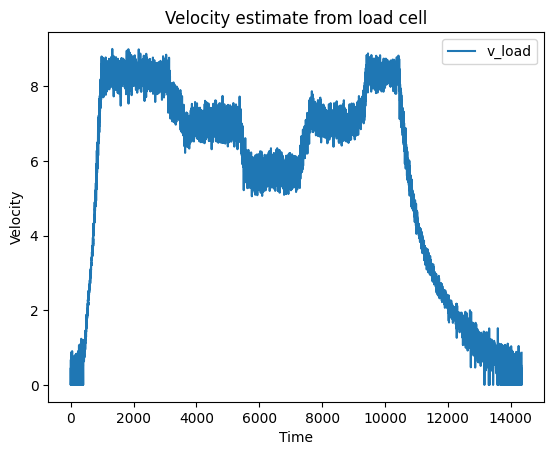

In [34]:
plt.figure()
plt.plot(v_est_load, label='v_load')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity estimate from load cell')
plt.legend()
plt.show()

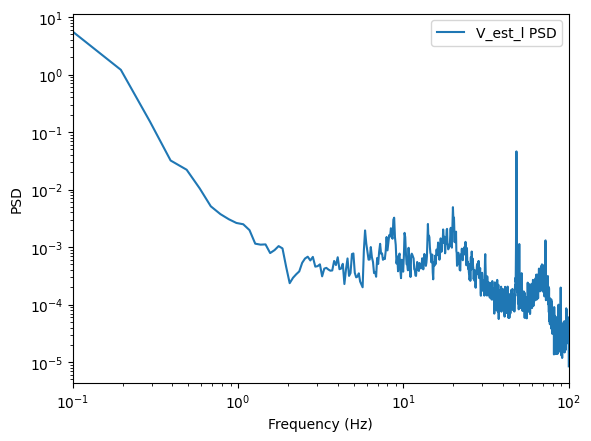

In [35]:
# Get PSD of this velocity
f, v_load_psd = welch(v_est_load, fs=fs, nperseg=nperseg)

plt.loglog(f, v_load_psd, label='V_est_l PSD')
# plt.loglog(f, P_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()


### Velocity Estimate from Encoder

Using linear regression to find the coefficients

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
ground_truth_df = ground_truth_df.reset_index(drop=True)
student_df = student_df.reset_index(drop=True)

# Take minimum length to ensure matching
min_length = min(len(ground_truth_df), len(student_df))

X = student_df['csv_col_1_diff'].values[:min_length].reshape(-1, 1)  # Delta counts
y = ground_truth_df['csv_col_0'].values[:min_length]  # Actual wind speed

print(f"Training samples: {len(X)}")
print(f"X (encoder counts) range: [{X.min():.4f}, {X.max():.4f}]")
print(f"y (wind speed) range: [{y.min():.4f}, {y.max():.4f}]")

Training samples: 14348
X (encoder counts) range: [-1.0000, 125.0000]
y (wind speed) range: [-0.3900, 8.9100]


In [38]:
# Linear Reg
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

print("Linear Regression Model:")
print(f"Wind Speed = {slope:.6f} * (Encoder Counts) + {intercept:.6f}")
print(f"\nSlope (m): {slope:.6f}")
print(f"Intercept (b): {intercept:.6f}")

Linear Regression Model:
Wind Speed = 0.067410 * (Encoder Counts) + 0.699788

Slope (m): 0.067410
Intercept (b): 0.699788


In [39]:
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print("Model Performance:")
print(f"R² Score: {r2:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

Model Performance:
R² Score: 0.972054
RMSE: 0.445587
MAE: 0.318708


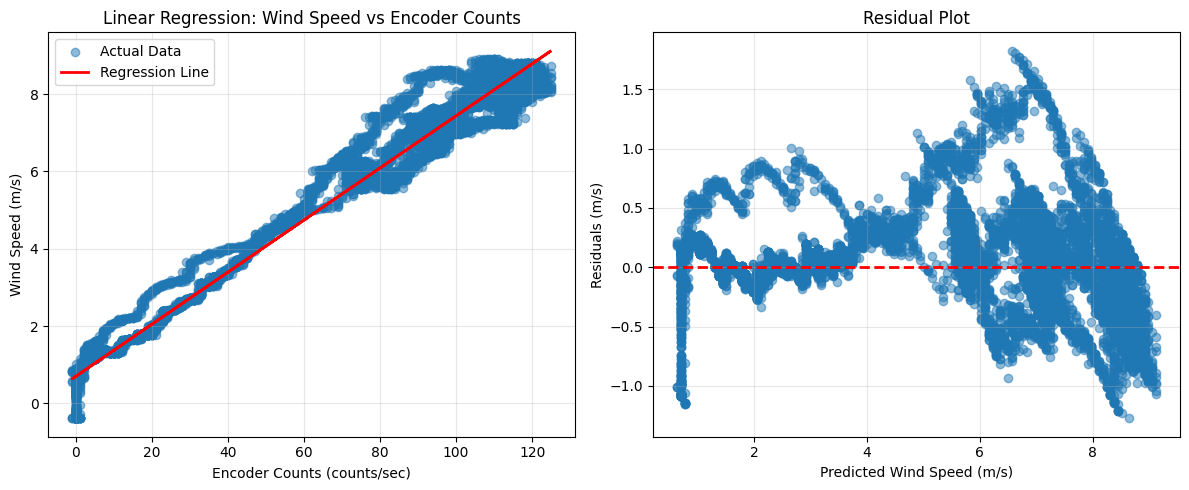

In [40]:
# Cell 7: Visualize the regression
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Encoder Counts (counts/sec)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Linear Regression: Wind Speed vs Encoder Counts')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Wind Speed (m/s)')
plt.ylabel('Residuals (m/s)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
# Apply those coefficients to the real data and plot

v_est_enc = slope * student_df['csv_col_1_diff'].values + intercept
# sean's values
v_est_enc_s = (0.00037409 / 0.005) * student_df['csv_col_1_diff'].values + 0.89063702
v_est_enc_d = 0.072351 * student_df['csv_col_1_diff'].values + 0.267609

print("First 5 elements:")
print("Original enc_data:", student_df['csv_col_1_diff'].values[:5])
print("Transformed v_est_enc:", v_est_enc[:5])

First 5 elements:
Original enc_data: [0. 0. 0. 0. 0.]
Transformed v_est_enc: [0.69978789 0.69978789 0.69978789 0.69978789 0.69978789]


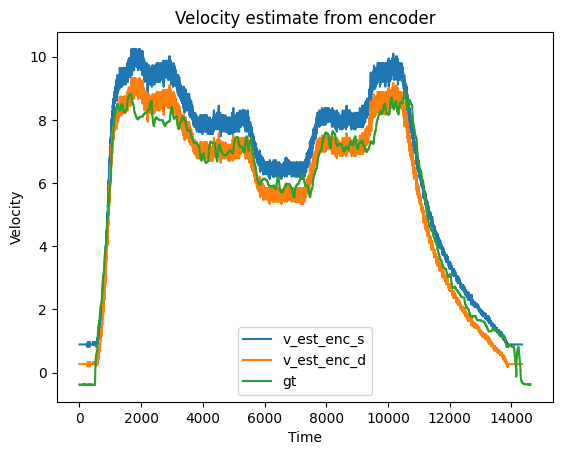

In [52]:
# Plot
plt.figure()
plt.plot(v_est_enc_s, label='v_est_enc_s')
plt.plot(v_est_enc_d, label='v_est_enc_d')
plt.plot(ground_truth_df['csv_col_0'].values, label="gt")
plt.plot()
plt.plot()
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity estimate from encoder')
plt.legend()
plt.show()

#### Attempt PSD again with values in the same unit

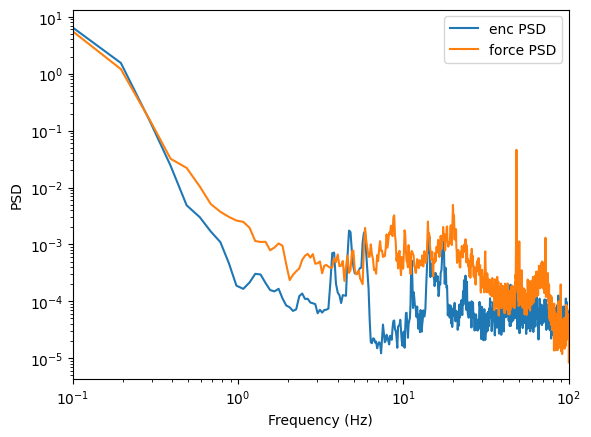

In [43]:
f, P_v_enc = welch(v_est_enc, fs=fs, nperseg=nperseg)
_, P_v_force = welch(v_est_load, fs=fs, nperseg=nperseg)

plt.figure()
plt.loglog(f, P_v_enc, label='enc PSD')
plt.loglog(f, P_v_force, label='force PSD')
plt.xlim(0.1, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.show()

## FUSION

Firstly calculating the MSE loss between the two estimates. Then using a complementary filter to get the dynamics (Using a single-pole LP for the load cell and the HP for the encoder)

In [44]:
# MSE LOSS - probs not representative
# Take minimum length to ensure matching arrays
min_length = min(len(ground_truth_df), len(student_df))
ground_truth = ground_truth_df['csv_col_0'].values[:min_length]

# Compute MSE for encoder estimate
mse_enc = mean_squared_error(ground_truth, v_est_enc[:min_length])
print(f"MSE between Ground Truth and Encoder Estimate: {mse_enc:.6f}")

# Compute MSE for load cell estimate
mse_load = mean_squared_error(ground_truth, v_est_load[:min_length])
print(f"MSE between Ground Truth and Load Cell Estimate: {mse_load:.6f}")

# Optional: Compute RMSE for both
rmse_enc = np.sqrt(mse_enc)
rmse_load = np.sqrt(mse_load)
print(f"\nRMSE for Encoder Estimate: {rmse_enc:.6f}")
print(f"RMSE for Load Cell Estimate: {rmse_load:.6f}")

MSE between Ground Truth and Encoder Estimate: 0.198548
MSE between Ground Truth and Load Cell Estimate: 0.702706

RMSE for Encoder Estimate: 0.445587
RMSE for Load Cell Estimate: 0.838276


In [45]:
# prefiltering
fc = 1
fs = 200
alpha_prefilt = (2*np.pi*fc/fs) / (1 + 2*np.pi*fc/fs)

In [ ]:
# Complementary filters 
fc_cross = 1
dt = 1 / 200
tau = 1/(2*np.pi*fc_cross)
alpha = dt/(tau + dt)

# Real time simulation

n = len(v_est_load)
    
# Initialize arrays
v_est = np.zeros(n)
LP_force = np.zeros(n)
LP_enc = np.zeros(n)

# Initialize first values
LP_force[0] = v_est_load[0]
LP_enc[0] = v_est_enc_d[0]
v_est[0] = v_est_enc[0] 

for i in range(1, n):
    # Update low-pass filters (this is the complementary filter logic)
    LP_force[i] = LP_force[i-1] + alpha * (v_est_load[i] - LP_force[i-1])
    LP_enc[i] = LP_enc[i-1] + alpha * (v_est_enc_d[i] - LP_enc[i-1])
    
    # Estimate velocity: high-pass encoder + low-pass force
    # (v_enc - LP_enc) = high frequency component from encoder
    # LP_force = low frequency component from force sensor
    # v_est[i] = (v_est_enc[i] - LP_enc[i]) + LP_force[i]
    v_est[i] = (LP_enc[i] * 0.3 + LP_force[i] * 0.7)

In [47]:
mse_final = mean_squared_error(ground_truth, v_est[:min_length])
print("MSE after filtering and fusion: ", mse_final)

MSE after filtering and fusion:  0.2726233301295316


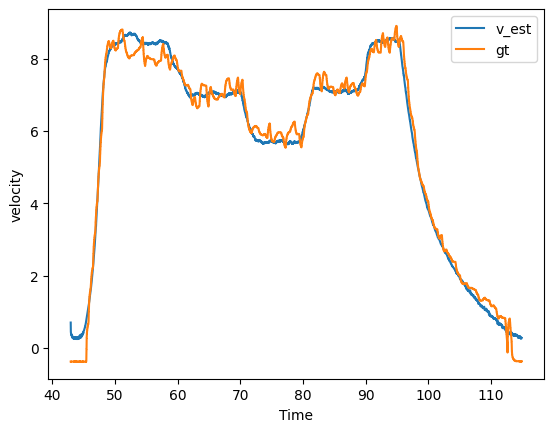

In [48]:
# Plot v_est over v
plt.figure()
plt.plot(student_df['t_rel_s'], v_est, label="v_est")
plt.plot(ground_truth_df['t_rel_s'], ground_truth_df['csv_col_0'].values, label="gt")
plt.xlabel("Time")
plt.ylabel("velocity")
plt.legend()
plt.show()